In [1]:
pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-io99uxn1
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-io99uxn1
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
CHECKPOINT_PATH='/kaggle/working/sam_vit_h_4b8939.pth'


import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [3]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)


mask_generator = SamAutomaticMaskGenerator(sam)

In [4]:
def show_output(result_dict, ind):
    sorted_result = sorted(result_dict, key=(lambda x: x['area']), reverse=True)
    # Plot for each segment area
    for val in sorted_result:
        mask = val['segmentation']
        img = np.ones((mask.shape[0], mask.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        im = plt.imshow(np.dstack((img, mask*0.5)))
    plt.axis('off')  # Turn off axis
    plt.savefig(os.path.join('./data/segmented_infected', f'output{ind}.png'), bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the figure


In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Give the path of your image
image_path = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/00ed3cc2-020b-499f-a951-d772dea3b154___FAM_L.Blight 4653.JPG'

image = cv2.imread(image_path)

# Check if the image is not empty
if image is not None:
    # Convert to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Generate segmentation mask
    output_mask = mask_generator.generate(image_rgb)
else:
    print("The file is empty and was skipped.")


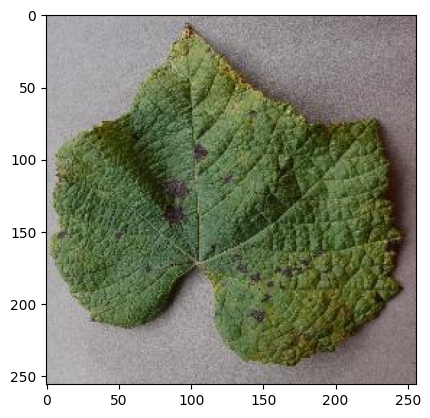

In [6]:
import matplotlib.image as mpimg
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.show()

In [7]:
import os
def show_output(result_dict):
    sorted_result = sorted(result_dict, key=(lambda x: x['area']), reverse=True)
    # Plot for each segment area
    for val in sorted_result:
        mask = val['segmentation']
        img = np.ones((mask.shape[0], mask.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        im = plt.imshow(np.dstack((img, mask*0.5)))
    plt.axis('off')  # Turn off axis
    #plt.savefig(os.path.join('./data/segmented_infected', f'output{ind}.png'), bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()  # Close the figure


In [8]:
output_mask

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 36041,
  'bbox': [5, 10, 239, 232],
  'predicted_iou': 1.0200976133346558,
  'point_coords': [[92.0, 156.0]],
  'stability_score': 0.9849115014076233,
  'crop_box': [0, 0, 256, 256]},
 {'segmentation': array([[False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 9471,
  'bbox': [98, 0, 157, 103],
 

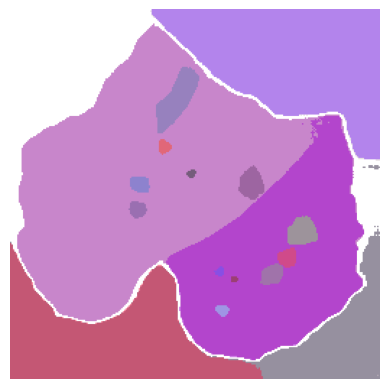

In [9]:
show_output(output_mask)

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np

def get_average_color(image, mask):
    # Apply the mask to the image
    masked_image = np.zeros_like(image)
    masked_image[mask] = image[mask]
    
    # Calculate the average color of the masked image
    average_color = masked_image.mean(axis=(0, 1))
    
    return average_color

def is_disease_color(image, val, disease_color, tolerance):
    # Get the average color of the segment
    mask = val['segmentation']
    average_color = get_average_color(image, mask)
    
    # Compare the average color to the disease color
    return np.allclose(average_color, disease_color, atol=tolerance)

In [11]:
def show_outputa(image, result_dict, max_area, disease_color, tolerance):
    sorted_result = sorted(result_dict, key=(lambda x: x['area']), reverse=True)
    # Initialize an empty mask
    combined_mask = np.zeros_like(image[:,:,0], dtype=bool)
    # Combine each segment area
    for val in sorted_result:
        if val['area'] < max_area or is_disease_color(image, val, disease_color, tolerance):
            mask = val['segmentation']
            # Combine the masks
            combined_mask = np.logical_or(combined_mask, mask)
    # Convert the boolean mask to an integer mask
    combined_mask_int = combined_mask.astype(int)
    plt.imshow(combined_mask_int, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.show()
    plt.close()  # Close the figure


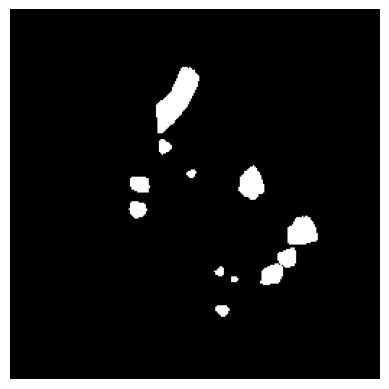

In [12]:
show_outputa(image, output_mask, 2000, [255, 0, 0], 50) 

In [13]:
def show_outputb(image, result_dict, max_area, disease_color, tolerance):
    sorted_result = sorted(result_dict, key=(lambda x: x['area']), reverse=True)
    # Initialize an empty mask
    combined_mask = np.zeros_like(image[:,:,0], dtype=bool)
    # Combine each segment area
    for val in sorted_result:
        if val['area'] > max_area or is_disease_color(image, val, disease_color, tolerance):
            mask = val['segmentation']
            # Combine the masks
            combined_mask = np.logical_or(combined_mask, mask)
    # Convert the boolean mask to an integer mask
    combined_mask_int = combined_mask.astype(int)
    plt.imshow(combined_mask_int, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.show()
    plt.close()  # Close the figure

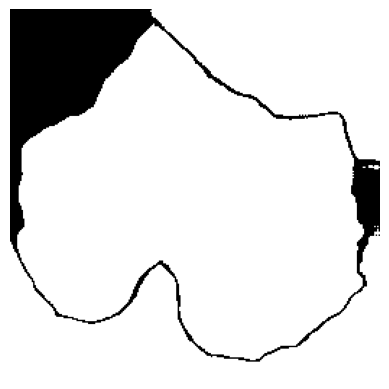

In [14]:
show_outputb(image, output_mask, 2000, [255, 0, 0], 50) 

In [15]:
def show_outputx(image, result_dict, max_area, disease_color, tolerance):
    sorted_result = sorted(result_dict, key=(lambda x: x['area']), reverse=True)
    # Initialize an empty mask
    combined_mask = np.zeros_like(image[:,:,0], dtype=bool)
    # Combine each segment area
    for val in sorted_result:
        if val['area'] < max_area or is_disease_color(image, val, disease_color, tolerance):
            mask = val['segmentation']
            # Combine the masks
            combined_mask = np.logical_or(combined_mask, mask)
    # Convert the boolean mask to an integer mask
    combined_mask_int = combined_mask.astype(int)
    return combined_mask_int  # Return the mask

def show_outputy(image, result_dict, max_area, disease_color, tolerance):
    sorted_result = sorted(result_dict, key=(lambda x: x['area']), reverse=True)
    # Initialize an empty mask
    combined_mask = np.zeros_like(image[:,:,0], dtype=bool)
    # Combine each segment area
    for val in sorted_result:
        if val['area'] > max_area or is_disease_color(image, val, disease_color, tolerance):
            mask = val['segmentation']
            # Combine the masks
            combined_mask = np.logical_or(combined_mask, mask)
    # Convert the boolean mask to an integer mask
    combined_mask_int = combined_mask.astype(int)
    return combined_mask_int  # Return the mask


def show_combined_output(image, result_dict, max_area, disease_color, tolerance):
    # Generate the masks
    mask_a = show_outputx(image, result_dict, max_area, disease_color, tolerance)  # Diseased parts
    mask_b = show_outputy(image, result_dict, max_area, disease_color, tolerance)  # Leaf
    
    # Initialize an RGB image with gray background
    combined_image = np.ones_like(image) * 128  # Gray background
    
    # Apply the masks with different colors
    combined_image[mask_b] = [0, 0, 0]  # Black for leaf
    combined_image[mask_a] = [255, 255, 255]  # White for diseased parts
    
    # Display the combined image
    plt.imshow(combined_image)
    plt.axis('off')  # Turn off axis
    plt.show()
    plt.close()  # Close the figure


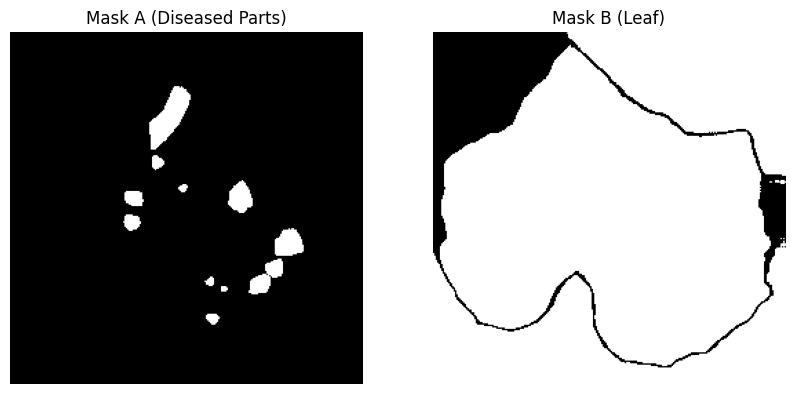

In [16]:
# Generate the masks
mask_a = show_outputx(image, output_mask, 5000, [255, 0, 0], 50)  # Diseased parts
mask_b = show_outputy(image, output_mask, 5000, [255, 0, 0], 50)  # Leaf

# Display the masks
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(mask_a, cmap='gray')
plt.title('Mask A (Diseased Parts)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_b, cmap='gray')
plt.title('Mask B (Leaf)')
plt.axis('off')

plt.show()


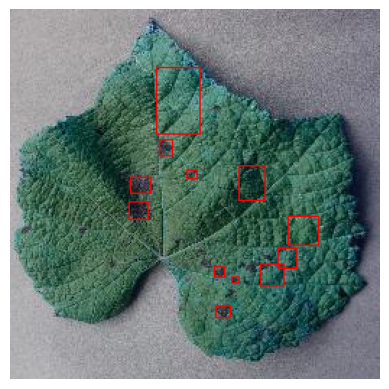

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_bounding_boxes(image, result_dict, max_area, disease_color, tolerance):
    # Sort the segments by area in descending order
    sorted_result = sorted(result_dict, key=lambda x: x['area'], reverse=True)

    # Initialize an empty image for drawing bounding boxes
    image_with_boxes = image.copy()

    # Iterate over each segment
    for val in sorted_result:
        if val['area'] < max_area or is_disease_color(image, val, disease_color, tolerance):
            mask = val['segmentation']
            # Find contours in the mask
            contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            # Draw bounding boxes around each contour
            for contour in contours:
                x, y, w, h = cv2.boundingRect(contour)
                # Check if the area of the bounding box is less than the specified max_area
                if w * h < max_area:
                    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (255, 0, 0), 1)  # Blue color

    return image_with_boxes
max_area = 7000  # Example threshold for segment area
disease_color = np.array([255, 0, 0])  # Example predefined disease color (blue)
tolerance = 10  # Example tolerance for color comparison

# Read the image
image = cv2.imread(image_path)

# Draw bounding boxes
image_with_boxes = draw_bounding_boxes(image, output_mask, max_area, disease_color, tolerance)

# Display the result
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()


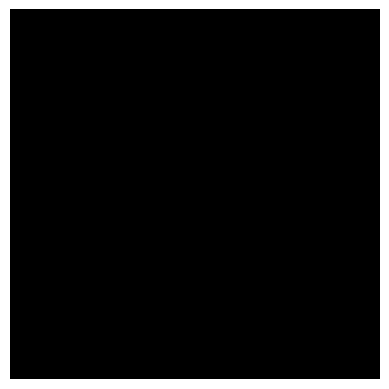

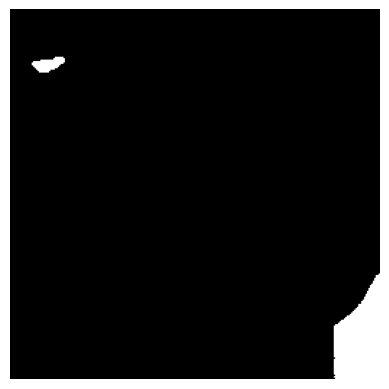

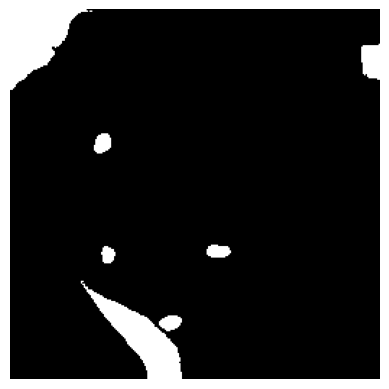

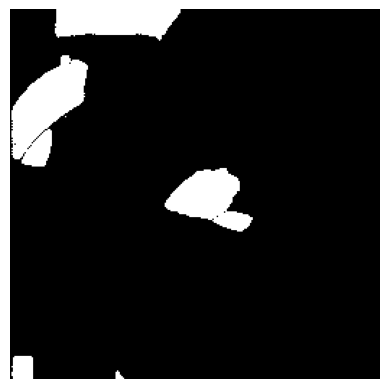

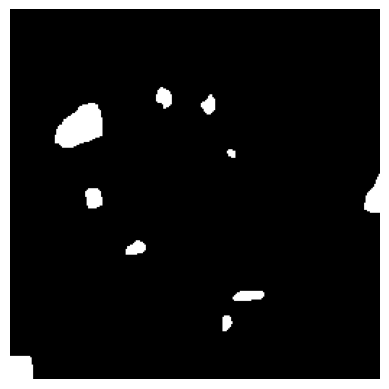

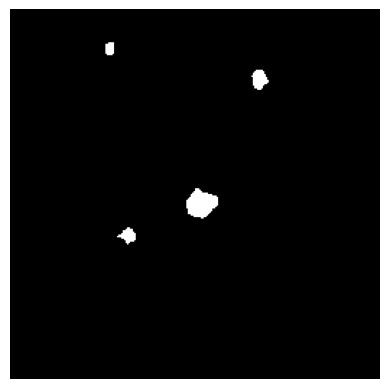

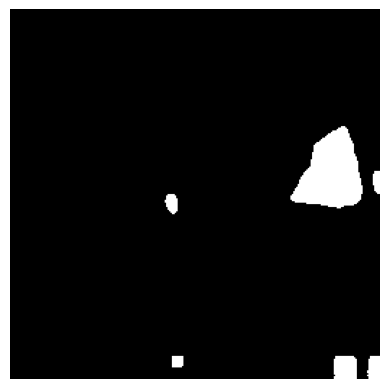

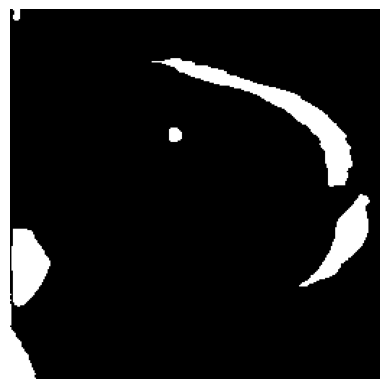

KeyboardInterrupt: 

In [18]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define your dataset directory and output directory
dataset_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/'
output_dir = '/kaggle/working/Apple___Apple_scab/'

# Iterate over each image in the subfolder
for file in os.listdir(dataset_dir):
    # Check if the file is an image
    if file.endswith(('.png', '.jpg', '.jpeg', '.JPG')):
        # Construct the file path
        file_path = os.path.join(dataset_dir, file)
        
        # Load the image
        image = cv2.imread(file_path)
        if image is not None:
            # Convert to RGB format
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Generate segmentation mask
            output_mask = mask_generator.generate(image_rgb)
            
            # Construct the output path
            output_path = os.path.join(output_dir, file)
            
            # Create the output directory if it doesn't exist
            os.makedirs(os.path.dirname(output_path), exist_ok=True)
            
            # Save the mask
            show_outputa(image, output_mask, 2000, [255, 0, 0], 50)
            plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
            plt.close()  # Close the figure


In [ ]:
!zip -r file.zip /kaggle/working/Apple___Apple_scab
from IPython.display import FileLink
FileLink(r'file.zip')

In [ ]:
import shutil
shutil.rmtree('/kaggle/working/Tomato___Late_blight/')